Loading Data

In [32]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize

In [33]:
# read in data
nyairbnb=pd.read_csv(r'C:\Programs\Python\Certificate\capstone\NY airbnb data\AB_NYC_2019.csv')
# examining head  
nyairbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [34]:
# checking type of every column in the dataset
nyairbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [35]:
# checking the size of the dataset
nyairbnb.shape

(48895, 16)

Data Cleaning and Wrangling 

In [36]:
# finding out null values for each column in the dataset
nyairbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [37]:
# dropping columns that are not necessary for future analysis
nyairbnb.drop(['id','host_name','last_review','reviews_per_month'], axis=1, inplace=True)
nyairbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Exploring and visualizing Data

In [38]:
# get statistics for the variables
nyairbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


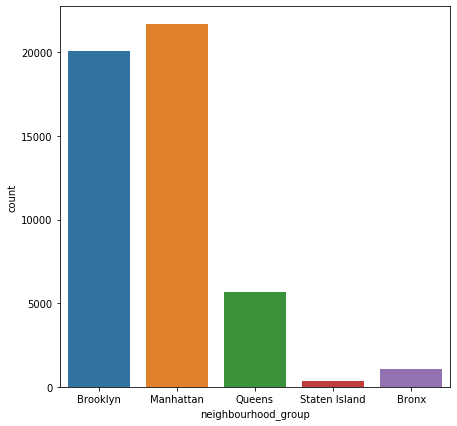

In [39]:
# compare number of listings across boroughs
plt.figure(figsize=(7,7))
nbyborough = sns.countplot(nyairbnb["neighbourhood_group"])

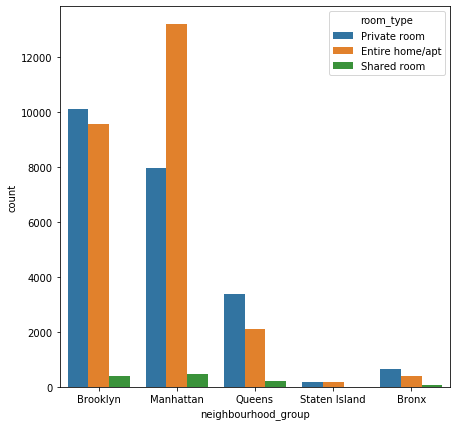

In [40]:
# compare number of listings between room types and across boroughs
plt.figure(figsize=(7,7))
byroomtype = sns.countplot(nyairbnb['neighbourhood_group'],hue=nyairbnb['room_type'])

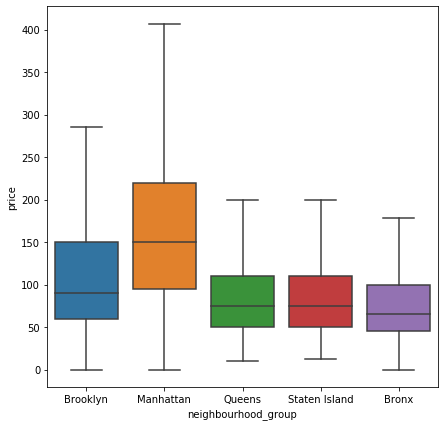

In [41]:
# compare distribution of price across boroughs
plt.figure(figsize=(7,7))
pricebox = sns.boxplot(data=nyairbnb, x='neighbourhood_group',y='price',showfliers=False)

Utilizing Foursquare API to Explore Manhattan

In [42]:
# Get Manhattan Data and Eliminate Outliers
manhattan_airbnb = nyairbnb[(nyairbnb['neighbourhood_group'] == 'Manhattan') & (nyairbnb['price'] <= 400)].reset_index(drop=True)
manhattan_airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
1,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
2,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
3,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
4,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220


In [43]:
# Use the downloaded New York Neighbourhood Data "newyork_data.json" from the lab
import json

with open(r"C:\Programs\Python\Certificate\capstone\NY airbnb data\newyork_data.json") as json_file:
    json_data = json.load(json_file)
    print(json_data)

{'type': 'FeatureCollection', 'totalFeatures': 306, 'features': [{'type': 'Feature', 'id': 'nyu_2451_34572.1', 'geometry': {'type': 'Point', 'coordinates': [-73.84720052054902, 40.89470517661]}, 'geometry_name': 'geom', 'properties': {'name': 'Wakefield', 'stacked': 1, 'annoline1': 'Wakefield', 'annoline2': None, 'annoline3': None, 'annoangle': 0.0, 'borough': 'Bronx', 'bbox': [-73.84720052054902, 40.89470517661, -73.84720052054902, 40.89470517661]}}, {'type': 'Feature', 'id': 'nyu_2451_34572.2', 'geometry': {'type': 'Point', 'coordinates': [-73.82993910812398, 40.87429419303012]}, 'geometry_name': 'geom', 'properties': {'name': 'Co-op City', 'stacked': 2, 'annoline1': 'Co-op', 'annoline2': 'City', 'annoline3': None, 'annoangle': 0.0, 'borough': 'Bronx', 'bbox': [-73.82993910812398, 40.87429419303012, -73.82993910812398, 40.87429419303012]}}, {'type': 'Feature', 'id': 'nyu_2451_34572.3', 'geometry': {'type': 'Point', 'coordinates': [-73.82780644716412, 40.887555677350775]}, 'geometry_n

In [44]:
# Transform the json file into a dataframe
# define the dataframe columns
column_names = ['Borough', 'Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighbourhoods = pd.DataFrame(columns=column_names)

In [45]:
neighbourhoods_data = json_data['features']

In [46]:
for data in neighbourhoods_data:
    borough = neighbourhood_name = data['properties']['borough'] 
    neighbourhood_name = data['properties']['name']
        
    neighbourhood_latlon = data['geometry']['coordinates']
    neighbourhood_lat = neighbourhood_latlon[1]
    neighbourhood_lon = neighbourhood_latlon[0]
    
    neighbourhoods = neighbourhoods.append({'Borough': borough,
                                          'Neighbourhood': neighbourhood_name,
                                          'Latitude': neighbourhood_lat,
                                          'Longitude': neighbourhood_lon}, ignore_index=True)

In [47]:
neighbourhoods.head()

,Borough,Neighbourhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [48]:
# Keep only neighbourhoods in Manhattan
manhattan_data = neighbourhoods[neighbourhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighbourhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [1]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'R3HUCPZM1UG0V10F5Y3OMDVWQQJVS5RFX3FF33QNFDDADIJWDS' # your Foursquare ID
CLIENT_SECRET = 'QKD4IFLWVKKTECO4PRNHXIJKKCREDTYJWGXVUJZV43SQZFJNAW' # your Foursquare Secret
VERSION = '20191003' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R3HUCPZM1UG0V10F5Y3OMDVWQQJVS5RFX3FF33QNFDDADIJWDS
CLIENT_SECRET:QKD4IFLWVKKTECO4PRNHXIJKKCREDTYJWGXVUJZV43SQZFJNAW


In [50]:
# Explore All Neighbourhoods in Manhattan
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        nearby_venues = json_normalize(results)
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
# Create New Dataframe
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighbourhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [52]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3327, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [53]:
# Get a new dataset that save the number of venues per neighbourhood
NVenues=manhattan_venues.groupby('Neighbourhood').count()
NVenues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Battery Park City to Yorkville
Data columns (total 6 columns):
Neighbourhood Latitude     40 non-null int64
Neighbourhood Longitude    40 non-null int64
Venue                      40 non-null int64
Venue Latitude             40 non-null int64
Venue Longitude            40 non-null int64
Venue Category             40 non-null int64
dtypes: int64(6)
memory usage: 2.2+ KB


In [54]:
NVenues.reset_index(level=0, inplace=True)
NVenues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Battery Park City,100,100,100,100,100,100
1,Carnegie Hill,100,100,100,100,100,100
2,Central Harlem,43,43,43,43,43,43
3,Chelsea,100,100,100,100,100,100
4,Chinatown,100,100,100,100,100,100


In [55]:
# Merge the data with manhattan_data
NVenues.drop(['Neighbourhood Longitude', 'Venue','Venue Latitude','Venue Longitude','Venue Category'], axis=1, inplace=True)
NVenues.head()

,Neighbourhood,Neighbourhood Latitude
0,Battery Park City,100
1,Carnegie Hill,100
2,Central Harlem,43
3,Chelsea,100
4,Chinatown,100


In [56]:
NVenues.rename(columns = {'Neighbourhood Latitude':'number_of_nearby_venues', 'Neighbourhood':'neighbourhood'}, inplace = True)
NVenues.head()

,neighbourhood,number_of_nearby_venues
0,Battery Park City,100
1,Carnegie Hill,100
2,Central Harlem,43
3,Chelsea,100
4,Chinatown,100


In [65]:
manhattan_airbnb1=pd.merge(manhattan_airbnb,NVenues, on='neighbourhood',how='left')
manhattan_airbnb1.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_nearby_venues
0,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,100.0
1,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,NaN
2,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,42.0
3,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,100.0
4,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220,NaN
5,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,1,0,100.0
6,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,4,188,100.0
7,Beautiful 1br on Upper West Side,7702,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,1,6,100.0
8,Central Manhattan/near Broadway,7989,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,1,39,NaN
9,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,1,333,100.0


In [66]:
manhattan_airbnb1.isnull().sum()

name                                 9
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_nearby_venues           5880
dtype: int64

In [67]:
# Change null value for number_of_nearby_venues to 0
manhattan_airbnb1=manhattan_airbnb1.fillna(0) 
manhattan_airbnb1.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_nearby_venues
0,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,100.0
1,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0.0
2,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,42.0
3,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,100.0
4,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220,0.0
5,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,1,0,100.0
6,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,4,188,100.0
7,Beautiful 1br on Upper West Side,7702,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,1,6,100.0
8,Central Manhattan/near Broadway,7989,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,1,39,0.0
9,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,1,333,100.0



Using Machine Learning to Predict Price

In [68]:
# Retain variables needed for multiple linear regression
variables = manhattan_airbnb1[['room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','number_of_nearby_venues','price']]
variables.head()

,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,number_of_nearby_venues,price
0,Entire home/apt,1,45,2,100.0,225
1,Private room,3,0,1,0.0,150
2,Entire home/apt,10,9,1,42.0,80
3,Entire home/apt,3,74,1,100.0,200
4,Private room,2,430,1,0.0,79


In [91]:
variables.shape

(20366, 6)

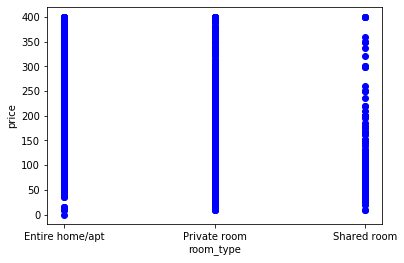

In [69]:
# plot price with respect to room type
plt.scatter(variables.room_type, variables.price,  color='blue')
plt.xlabel("room_type")
plt.ylabel("price")
plt.show()

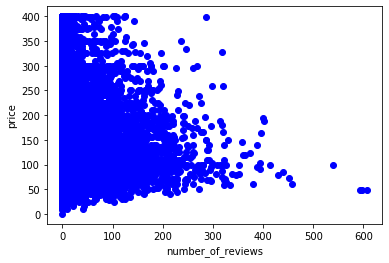

In [70]:
# plot price with respect to number of reviews
plt.scatter(variables.number_of_reviews, variables.price,  color='blue')
plt.xlabel("number_of_reviews")
plt.ylabel("price")
plt.show()

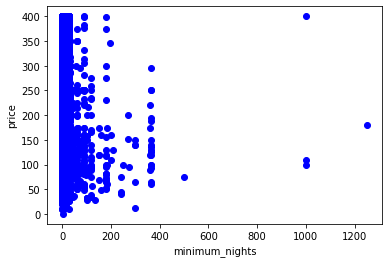

In [71]:
# plot price with respect to minimum nights
plt.scatter(variables.minimum_nights, variables.price,  color='blue')
plt.xlabel("minimum_nights")
plt.ylabel("price")
plt.show()

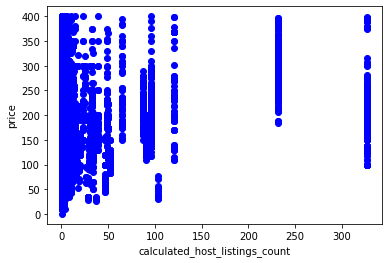

In [72]:
# plot price with respect to number of listings
plt.scatter(variables.calculated_host_listings_count, variables.price,  color='blue')
plt.xlabel("calculated_host_listings_count")
plt.ylabel("price")
plt.show()

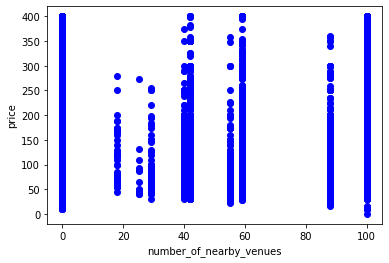

In [73]:
# plot price with respect to number of nearby venues
plt.scatter(variables.number_of_nearby_venues, variables.price,  color='blue')
plt.xlabel("number_of_nearby_venues")
plt.ylabel("price")
plt.show()

In [74]:
# get correlations between variables
variables.corr()

,minimum_nights,number_of_reviews,calculated_host_listings_count,number_of_nearby_venues,price
minimum_nights,1.000000,-0.087959,0.141754,0.044290,0.024943
number_of_reviews,-0.087959,1.000000,-0.100310,-0.074107,-0.078694
calculated_host_listings_count,0.141754,-0.100310,1.000000,0.076138,0.188121
number_of_nearby_venues,0.044290,-0.074107,0.076138,1.000000,0.161208
price,0.024943,-0.078694,0.188121,0.161208,1.000000


In [75]:
# get dummies for categorical variables
nyc=variables.copy()
nyc.dropna(inplace=True)
nyc_dummies = pd.get_dummies(nyc)
nyc_dummies.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,number_of_nearby_venues,price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,45,2,100.0,225,1,0,0
1,3,0,1,0.0,150,0,1,0
2,10,9,1,42.0,80,1,0,0
3,3,74,1,100.0,200,1,0,0
4,2,430,1,0.0,79,0,1,0


In [76]:
# create train and test data
Y = nyc_dummies['price']
nyc_dummies.drop(['price'],axis=1,inplace=True)
X = nyc_dummies
msk = np.random.rand(len(nyc_dummies)) < 0.8
X_train = X[msk]
X_test = X[~msk]
Y_train = Y[msk]
Y_test = Y[~msk]

In [85]:
# Multiple regression model
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = np.asanyarray(X_train)
y = np.asanyarray(Y_train)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     1322.
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:01:10   Log-Likelihood:                -91939.
No. Observations:               16308   AIC:                         1.839e+05
Df Residuals:                   16301   BIC:                         1.839e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0604      1.096     82.159      0.0

In [89]:
# Multiple regression model
regr = linear_model.LinearRegression()
x = np.asanyarray(X_train)
y = np.asanyarray(Y_train)
regr.fit (x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
# prediction
y_hat= regr.predict(X_test)
X = np.asanyarray(X_test)
y = np.asanyarray(Y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, y))

Residual sum of squares: 4442.61
Variance score: 0.34
